In [1]:
import pandas as pd 
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [2]:
import plotly
plotly.__version__

'3.7.0'

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
join_df = pd.read_csv('./data/join_df_biology_chemistry.csv')

In [5]:
join_df.head()

,text,title,title_and_text,label
0,"**intro**\n \n hello everyone, welcome bac...",[2019/03/29] synthetic challenge #78,"**intro**\n \n hello everyone, welcome bac...",0
1,this is a dedicated weekly thread for you to s...,weekly careers/education questions thread,this is a dedicated weekly thread for you to s...,0
2,the,i was doing the rotameter calibration by a old...,thei was doing the rotameter calibration by a ...,0
3,the,a traffic light reaction i had to make for my ...,thea traffic light reaction i had to make for ...,0
4,the,"this ""black fire"" i made using a low pressure ...","thethis ""black fire"" i made using a low pressu...",0


## Baseline accuracy 

- ```df['label']``` this will be our y 

In [6]:
## baseline accuracy 

join_df['label'].value_counts(normalize = True)

0    0.504026
1    0.495974
Name: label, dtype: float64

## Train Test Split 

- using sort of a 'bag of words' approach by using the combined features 'title_and_text' 
- our y is the binarized label column from each subreddit 

In [7]:
join_df.head()

,text,title,title_and_text,label
0,"**intro**\n \n hello everyone, welcome bac...",[2019/03/29] synthetic challenge #78,"**intro**\n \n hello everyone, welcome bac...",0
1,this is a dedicated weekly thread for you to s...,weekly careers/education questions thread,this is a dedicated weekly thread for you to s...,0
2,the,i was doing the rotameter calibration by a old...,thei was doing the rotameter calibration by a ...,0
3,the,a traffic light reaction i had to make for my ...,thea traffic light reaction i had to make for ...,0
4,the,"this ""black fire"" i made using a low pressure ...","thethis ""black fire"" i made using a low pressu...",0


In [8]:
# Split the data 

X = join_df['title_and_text']
y = join_df['label']


#Train Test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify  = y) #stratify will maintain the baseline average

## Summary of CVEC and TVEC values from ```patrick_reddit_data_cleaning```

### CountVectorizer 
- stop_words = 'english'
- max_features= 700  
- token_pattern= "[A-z]{2,}[\d]*")


### TF-IDF
- stop_words = 'english'
- max_features= 700  
- token_pattern= "[A-z]{2,}[\d]*")

## Model Part 1: 

### Can we compare the effect of using a regression compared to a classifier 
- using the TVEC Score 
- KNN vs Logistic Regression 

### Instantiate a Pipe for both

In [9]:
pipe_knn  = Pipeline([
    ('tvec', TfidfVectorizer()), # this is the flow of the data through the model
    ('knn', KNeighborsClassifier())
]) 

In [10]:
pipe_logreg = Pipeline([
    ('tvec', TfidfVectorizer()), # this is how the the data will flow through the model
    ('logreg', LogisticRegression())
])

### Cross Val Score

In [11]:
# Cross Val Score 
#pipe_knn 
print (cross_val_score(pipe_knn, X_train, y_train, cv=5).mean())

#pipe_logreg
print (cross_val_score(pipe_logreg, X_train, y_train, cv=5).mean())

#The KNN classifier performs worse than the logistic regressions  

0.9763930540601086


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.9903427444122471


### KNN 

In [12]:
# Fit your model
pipe_knn.fit(X_train, y_train)

# Training score
print (pipe_knn.score(X_train, y_train))

# Test score
print (pipe_knn.score(X_test, y_test))

#Results: 

## CrossVal = 0.95
## Training Score = 0.97
## Test Score = 0.95

0.9838969404186796
0.9774557165861514


### Logistic Regression

In [13]:
# Fit your model
pipe_logreg.fit(X_train, y_train)

# Training score
print (pipe_logreg.score(X_train, y_train))

# Test score
print (pipe_logreg.score(X_test, y_test))

# Results 
## CrossVal = 0.99
## Training Score = 0.99
## Test Score = 0.99

0.9903381642512077
0.9855072463768116


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## Model 2: 

### We just used a baseline TVEC and compared KNN vs Logistic Regression 

### Lets use ```GridSearchCV``` to tune a couple of different hyperparameters for our two different estimators

In [14]:
#Instatiate our Models 
# tvec = TfidfVectorizer()
# knn = KNeighborsClassifier()

params = { 'tvec__stop_words': [None, 'english'], #None and English are the options to tune over 
         'tvec__max_features': [250, 500, 750, 1_000]} #changing word count Only the top 1,000 words from the entire corpus will be saved

gs = GridSearchCV(pipe_knn, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

print (gs.best_score_) #cross_val_score
gs.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9908749329039184


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.2s finished


{'tvec__max_features': 750, 'tvec__stop_words': 'english'}

In [15]:
df_gridsearch_knn_tvec = pd.DataFrame(gs.cv_results_)

df_gridsearch_knn_tvec

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tvec__max_features,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.064039,0.003080,0.056056,0.003833,250,None,"{'tvec__max_features': 250, 'tvec__stop_words'...",0.834138,0.847021,0.832528,0.837896,0.006486,8,0.913043,0.908213,0.909018,0.910091,0.002113
1,0.061517,0.003590,0.042449,0.002221,250,english,"{'tvec__max_features': 250, 'tvec__stop_words'...",0.914654,0.956522,0.933977,0.935051,0.017109,6,0.946860,0.969404,0.938003,0.951422,0.013219
2,0.068402,0.003060,0.060655,0.001699,500,None,"{'tvec__max_features': 500, 'tvec__stop_words'...",0.714976,0.982287,0.996779,0.898014,0.129563,7,0.826087,0.987923,0.987118,0.933709,0.076101
3,0.058762,0.002457,0.042594,0.001383,500,english,"{'tvec__max_features': 500, 'tvec__stop_words'...",0.985507,0.987118,0.996779,0.989801,0.004978,5,0.992754,0.991143,0.987923,0.990607,0.002008
4,0.063707,0.002802,0.059043,0.001508,750,None,"{'tvec__max_features': 750, 'tvec__stop_words'...",0.985507,0.988728,0.996779,0.990338,0.004741,3,0.992754,0.991143,0.987118,0.990338,0.002370
5,0.061527,0.002954,0.043285,0.000977,750,english,"{'tvec__max_features': 750, 'tvec__stop_words'...",0.987118,0.988728,0.996779,0.990875,0.004227,1,0.992754,0.991143,0.987118,0.990338,0.002370
6,0.063491,0.002448,0.062168,0.004140,1000,None,"{'tvec__max_features': 1000, 'tvec__stop_words...",0.985507,0.988728,0.996779,0.990338,0.004741,3,0.992754,0.991143,0.987118,0.990338,0.002370
7,0.058213,0.000989,0.043503,0.002424,1000,english,"{'tvec__max_features': 1000, 'tvec__stop_words...",0.987118,0.988728,0.996779,0.990875,0.004227,1,0.992754,0.991143,0.987118,0.990338,0.002370


In [16]:
pipe_knn  = Pipeline([
    ('tvec', TfidfVectorizer(max_features=750, stop_words='english')), # this is the flow of the data through the model
    ('knn', KNeighborsClassifier())
]) 


# Fit your model
pipe_knn.fit(X_train, y_train)

# Training score
print (pipe_knn.score(X_train, y_train))

# Test score
print (pipe_knn.score(X_test, y_test))

0.9908749329039184
0.9871175523349437


In [89]:
# fpr,tpr,_= roc_curve(y_test, log_predictions)

# Fit your model
pipe_knn.fit(X_train, y_train)

# Training score
print (pipe_knn.score(X_train, y_train))

# Test score
print (pipe_knn.score(X_test, y_test))

predictions_knn = pipe_knn.predict(X_test)

# pipe_logreg.coef()

0.9908749329039184
0.9871175523349437


In [90]:
predictions_knn_prob = pipe_knn.predict_proba(X_test)[:,0]

In [91]:
from sklearn.metrics import roc_curve, auc



ftp_knn, tpr_knn, _= roc_curve(y_test, predictions_knn_prob)

## Model 2.1 ~ 

### Using GridSearchCV for the Logistic Regresions



In [48]:
params = { 'tvec__stop_words': [None, 'english'], #None and English are the options to tune over 
         'tvec__max_features': [250, 500, 750, 1_000]} #changing word count Only the top 1,000 words from the entire corpus will be saved

gs = GridSearchCV(pipe_logreg, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

print (gs.best_score_) #cross_val_score
gs.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.9892646269457863


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.5s finished


{'tvec__max_features': 750, 'tvec__stop_words': 'english'}

In [17]:
## Using these params in the model 

pipe_logreg = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', max_features= 750)), # this is how the the data will flow through the model
    ('logreg', LogisticRegression())
])

In [30]:
# Fit your model
pipe_logreg.fit(X_train, y_train)

# Training score
print (pipe_logreg.score(X_train, y_train))

# Test score
print (pipe_logreg.score(X_test, y_test))

predictions = pipe_logreg.predict(X_test)

# pipe_logreg.coef()

0.991411701556629
0.9871175523349437


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [31]:
# Import confusion matrix.
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [32]:
# What is the specificity of our test set? TN/N

spec = tn / (tn+fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9808


In [33]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(y_test, predictions)

0.9871685822165055

In [50]:
predictions.shape

(621,)

In [59]:
predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

In [54]:
y_test.shape

(621,)

In [60]:
log_predictions = pipe_logreg.predict_proba(X_test)[:,0]

In [61]:
log_predictions.shape

(621,)

In [ ]:
# Compute ROC curve and ROC area for each class

#Some Examples... 

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# #Another Examples... 


# import numpy as np
# from sklearn import metrics
# y = np.array([1, 1, 2, 2])
# scores = np.array([0.1, 0.4, 0.35, 0.8])
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
# fpr

# tpr

# thresholds

In [87]:
from sklearn.metrics import roc_curve, auc

fpr_logreg,tpr_logreg,_= roc_curve(y_test, log_predictions)

<function matplotlib.pyplot.show(*args, **kw)>

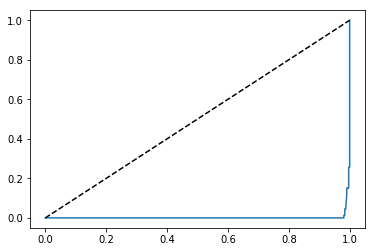

In [66]:


import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show

## Model 3: 

Using a Bayes Algo 

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
tvec_bayes = TfidfVectorizer(stop_words='english', max_features= 750)

In [72]:
cvec_bayes = CountVectorizer(stop_words='english', max_features= 750)

In [73]:
join_df.head()

,text,title,title_and_text,label
0,"**intro**\n \n hello everyone, welcome bac...",[2019/03/29] synthetic challenge #78,"**intro**\n \n hello everyone, welcome bac...",0
1,this is a dedicated weekly thread for you to s...,weekly careers/education questions thread,this is a dedicated weekly thread for you to s...,0
2,the,i was doing the rotameter calibration by a old...,thei was doing the rotameter calibration by a ...,0
3,the,a traffic light reaction i had to make for my ...,thea traffic light reaction i had to make for ...,0
4,the,"this ""black fire"" i made using a low pressure ...","thethis ""black fire"" i made using a low pressu...",0


In [74]:
#Fit/Train Both The Training and the Test set for 
X_train_cvec = cvec_bayes.fit_transform(X_train)
X_test_cvec = cvec_bayes.fit_transform(X_test)

df_cvec = pd.DataFrame(X_test_cvec.toarray(), columns = cvec_bayes.get_feature_names())

df_cvec

,000,01,0ahukewjnodvz763hahvpmawkhe,10,100g,15,1920,1mg,20,2019,...,worth,write,wrong,www,x200b,year,years,youtube,zinc,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#Fit/Transform Both the Training and the Test 
X_train_tvec = tvec_bayes.fit_transform(X_train)
X_test_tvec = tvec_bayes.fit_transform(X_test)

df_tvec = pd.DataFrame(X_train_tvec.toarray(), columns = tvec_bayes.get_feature_names())

df_tvec.head()

,000,01,0ahukewjnodvz763hahvpmawkhe,10,100g,15,1920,1mg,20,2019,...,worth,write,wrong,www,x200b,year,years,youtube,zinc,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.148772,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.116246,0.0,0.0,0.0


In [76]:
#Instantiate our model 
multiNB = MultinomialNB()

# Fit our model 
model  = multiNB.fit(X_train_tvec, y_train)

#Make some predictions 
predictions =  model.predict(X_test_tvec)

nb_score_train = model.score(X_train_tvec, y_train)


nb_score_test = model.score(X_test_tvec, y_test)

from sklearn.metrics import confusion_matrix

# Make a confusion Matrix 
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print('Scores for TVEC and MultinomialNB')
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('MultinomiaNB Score, Train: %s' % nb_score_train)
print('MultinomialNB Score, Test: %s' % nb_score_test) 

Scores for TVEC and MultinomialNB
True Negatives: 124
False Positives: 189
False Negatives: 112
True Positives: 196
MultinomiaNB Score, Train: 0.9651100375738056
MultinomialNB Score, Test: 0.5152979066022544


In [80]:
predict_prob_x =  model.predict_proba(X_test_tvec)[:,0]

In [81]:
predict_prob_x.shape

(621,)

In [83]:
y_test.shape

(621,)

In [85]:
# fpr,tpr,_= roc_curve(y_test, log_predictions)



fpr_mNB, tpr_mNB,_=roc_curve(y_test, predict_prob_x)

## What does this Bayes Classifier perform so much worse? 

<function matplotlib.pyplot.show(*args, **kw)>

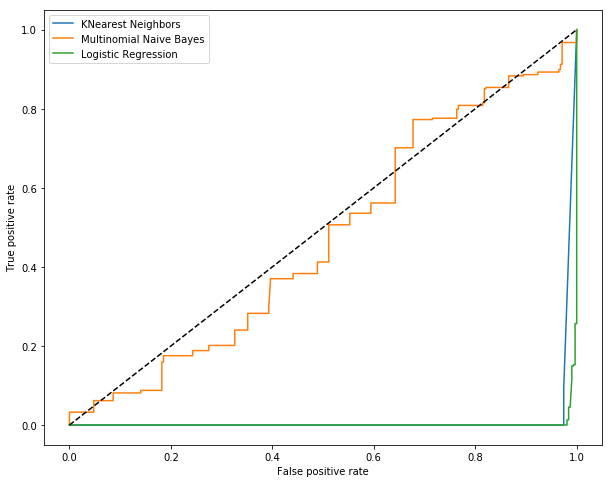

In [98]:
#ROC curve

plt.figure(figsize=(10,8))
plt.plot(ftp_knn, tpr_knn, label='KNearest Neighbors')
plt.plot(fpr_mNB, tpr_mNB, label='Multinomial Naive Bayes')
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show